# Week 5 -- Analysis

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
warnings.simplefilter('ignore')

In [12]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

### Update the number of weeks

In [13]:
no_games = 5

## Functions

In [14]:
def per_week_stats(dataframe, column1, column2):
    dataframe[column1 + '_pG'] = dataframe[column1]/dataframe[column2]

In [15]:
def per_week(dataframe, column1, no_games):
    dataframe[column1 + '_pG'] = dataframe[column1]/no_games

In [16]:
def print_metric(dataframe, metric, player_inx):
    average = round(dataframe[metric].mean(), 2)
    player_name = dataframe['Player'][player_inx]
    player = round(dataframe[metric][player_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(player_name + ' ' + metric + ': ' + str(player))
    print('-' * 50)
    return average, player_name, player

In [17]:
def print_metric_team(dataframe, metric, team_inx):
    average = round(dataframe[metric].mean(), 2)
    team_name = dataframe['Team'][team_inx]
    team = round(dataframe[metric][team_inx], 2)
    print('Avg ' + metric + ': ' + str(average))
    print(team_name + ' ' + metric + ': ' + str(team))
    print('-' * 50)
    return average, team_name, team

In [18]:
def bar_plot(x, y, metric, x_label, y_label):
    plt.figure(figsize = (10, 6))
    
    plt.bar(x, y)
    
    plt.title(metric)
    plt.xlabel(x_label)
    plt.xticks(rotation=45)
    plt.ylabel(y_label)
    plt.show()

## Read in DataFrames

In [19]:
offense = pd.read_pickle('players')
defense = pd.read_pickle('defense')

In [20]:
print(offense.shape)
offense.head()

(501, 34)


,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5
0,Alvin Kamara,NOR,RB,25,5,4,0,0,0,0,0,61,281,10.10,4,45,38,395,13.90,3,0,0,7,0,0,128.60,1,1,109.60,18.70,29.40,31.70,17.90,11.90
1,Russell Wilson,SEA,QB,32,5,5,123,169,1502,19,3,23,153,12.50,0,0,0,0,0.00,0,1,0,0,0,1,150.40,1,2,150.40,31.80,34.40,36.80,21.90,25.50
2,Dalvin Cook,MIN,RB,25,5,5,0,0,0,0,0,92,489,8.20,7,16,12,64,8.30,0,1,1,7,3,0,107.30,2,3,101.30,20.80,15.10,23.90,26.60,14.90
3,Patrick Mahomes,KAN,QB,25,5,5,123,193,1474,13,1,24,129,8.80,2,0,0,0,0.00,0,0,0,2,0,2,138.90,2,4,138.80,20.40,27.50,40.00,20.20,30.70
4,Josh Allen,BUF,QB,24,5,5,131,189,1589,14,3,29,101,7.80,3,0,0,0,0.00,0,3,3,3,0,0,138.70,3,5,138.60,28.20,34.50,32.20,25.40,18.30


In [21]:
print(defense.shape)
defense.head()

(32, 28)


,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5
0,Baltimore Ravens,76,333,5.00,1675,125,460,3.70,3,192,5.80,128,10.50,1215,6,10,7,70.00,10,3,7,16,63.00,15.00,15.00,1.00,6.00,26.00
1,Pittsburgh Steelers,87,240,5.00,1206,77,256,3.30,3,143,5.80,85,12.90,950,8,12,7,58.30,7,6,1,20,36.00,8.00,13.00,7.00,10.00,8.00
2,Indianapolis Colts,88,285,4.70,1330,119,432,3.60,1,155,5.40,95,10.20,898,7,12,7,58.30,9,9,0,11,57.00,4.00,15.00,26.00,7.00,5.00
3,Los Angeles Rams,90,314,4.80,1521,113,532,4.70,5,181,4.90,116,9.70,989,5,17,10,58.80,6,4,2,20,38.00,4.00,7.00,4.00,11.00,12.00
4,Tennessee Titans,90,264,6.20,1637,108,593,5.50,3,151,6.70,97,11.20,1044,9,12,10,83.30,9,6,3,5,23.00,3.00,5.00,7.00,10.00,8.00


In [22]:
per_week(defense, 'Ttl_Pts_Allowed', no_games)
per_week(defense, 'Ttl_Yds', no_games)
per_week(defense, 'Rushing_Att', no_games)
per_week(defense, 'Rushing_Yds', no_games)
per_week(defense, 'Passing_Att', no_games)
per_week(defense, 'Completions', no_games)
defense['Completion_Percent_Allowed'] = defense['Completions']/defense['Passing_Att']
per_week(defense, 'Passing_Yds', no_games)
per_week(defense, 'Sacks', no_games)
per_week(defense, 'TTL', no_games)

In [23]:
offense[offense['Player'] == "Le'Veon Bell"]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5
252,Le'Veon Bell,NYJ,RB,28,2,2,0,0,0,0,0,19,74,11.90,0,3,3,39,13.00,0,0,0,0,0,0,12.80,74,,11.30,4.60,0.00,0.00,0.00,6.70


In [24]:
taken_wrt = ['Davantae Adams', 'Keenan Allen', 'Mark Andrews', 'Odell Beckham Jr.', "Le'Veon Bell", 'Tyler Boyd', 
             'A.J. Brown', 'John Brown', 'Marquise Brown', 'DJ Chark', 'Nick Chubb', 'James Conner', 'Dalvin Cook', 
             'Jared Cook', 'Amari Cooper', 'Mike Davis', 'Stefon Diggs', 'Kenyan Drake', 'Julian Edelman', 
             'Clyde Edwards-Helaire', 'Austen Ekeler', 'Ezekiel Elliott', 'Evan Engram', 'Zach Ertz', 'Mike Evans', 
             'Noah Fant', 'Will Fuller', 'Michael Gallup', 'Mike Gesicki', 'Antonio Gibson', 'Chris Godwin',
             'Kenny Golladay', 'Melvin Gordon', 'A.J. Green', 'Todd Gurley', 'Hunter Henry', 'Tyler Higbee', 
             'Tyreek Hill', 'T.Y. Hilton', 'T.J. Hockenson', 'Jordan Howard', 'Kareem Hunt', 'Hayden Hurst', 
             'Josh Jacobs', 'Jerry Jeudy', 'David Johnson', 'Aaron Jones', 'Alvin Kamara', 'Travis Kelce', 
             'George Kittle', 'Cooper Kupp', 'CeeDee Lamb', 'Tyler Lockett', 'Christian McCaffrey', 'Jerick McKinnon', 
             'D.K. Metcalf', 'Joe Mixon', 'David Montgomery', 'DJ Moore', 'Zack Moss', 'Raheem Mostert', 
             'DeVante Parker', 'Calvin Ridley', 'James Robinson', 'Allen Robinson', 'Miles Sanders',
             'Devin Singletary', 'Darius Slayton', 'JuJu Smith-Schuster', 'Jonathan Taylor', 'Adam Thielen',
             'Michael Thomas', 'Darren Waller', 'Robert Woods']


In [10]:
taken_qbs = ['Josh Allen', 'Tom Brady', 'Drew Brees', 'Joe Burrow', 'Jared Goff', 'Lamar Jackson', 'Daniel Jones', 
             'Patrick Mahomes', 'Kyler Murray', 'Cam Newton', 'Ben Roethlisberger', 'Matt Ryan', 'Matthew Stafford', 
             'Deshaun Watson', 'Carson Wentz', 'Russell Wilson']

In [26]:
taken_k = ['Harrison Butker', 'Jake Elliot', 'Matt Gay', 'Zane Gonzalez', 'Robbie Gould', 'Wil Lutz', 'Justin Tucker',
           'Greg Zuerlein']

In [25]:
myteam_wrt = ['Robby Anderson', 'Chris Carson', 'Jamison Crowder', 'Damien Harris', 'Darrell Henderson', 
              'Derrick Henry', 'DeAndre Hopkins', 'Diontae Johnson', 'Julio Jones', 'Dalton Schultz', 'Jonnu Smith']


## QB Analysis

In [27]:
quarterbacks = offense[offense['Position'] == 'QB']
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5
1,Russell Wilson,SEA,QB,32,5,5,123,169,1502,19,3,23,153,12.50,0,0,0,0,0.00,0,1,0,0,0,1,150.40,1,2,150.40,31.80,34.40,36.80,21.90,25.50
3,Patrick Mahomes,KAN,QB,25,5,5,123,193,1474,13,1,24,129,8.80,2,0,0,0,0.00,0,0,0,2,0,2,138.90,2,4,138.80,20.40,27.50,40.00,20.20,30.70
4,Josh Allen,BUF,QB,24,5,5,131,189,1589,14,3,29,101,7.80,3,0,0,0,0.00,0,3,3,3,0,0,138.70,3,5,138.60,28.20,34.50,32.20,25.40,18.30
5,Dak Prescott,DAL,QB,27,5,5,151,222,1856,9,4,18,93,6.70,3,1,1,11,11.00,1,3,3,4,1,1,139.10,4,6,138.60,17.60,39.80,29.50,38.30,13.40
10,Kyler Murray,ARI,QB,23,5,5,126,181,1299,8,6,41,296,9.20,5,0,0,0,0.00,0,1,1,5,0,0,135.60,5,11,135.50,27.30,33.10,24.70,23.10,27.30


In [28]:
per_week_stats(quarterbacks, 'CompletedPasses', 'Games')
per_week_stats(quarterbacks, 'PassesAttempted', 'Games')
quarterbacks['Completion_Percent'] = quarterbacks['CompletedPasses_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'PassingYds', 'Games')
per_week_stats(quarterbacks, 'PassingTDs', 'Games')
quarterbacks['Yds_pAtt'] = quarterbacks['PassingYds_pG']/quarterbacks['PassesAttempted_pG']
per_week_stats(quarterbacks, 'RushingYds', 'Games')
per_week_stats(quarterbacks, 'TTL', 'Games')

In [29]:
quarterbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,RushingYds_pG,TTL_pG
1,Russell Wilson,SEA,QB,32,5,5,123,169,1502,19,3,23,153,12.50,0,0,0,0,0.00,0,1,0,0,0,1,150.40,1,2,150.40,31.80,34.40,36.80,21.90,25.50,24.60,33.80,0.73,300.40,3.80,8.89,30.60,30.08
3,Patrick Mahomes,KAN,QB,25,5,5,123,193,1474,13,1,24,129,8.80,2,0,0,0,0.00,0,0,0,2,0,2,138.90,2,4,138.80,20.40,27.50,40.00,20.20,30.70,24.60,38.60,0.64,294.80,2.60,7.64,25.80,27.76
4,Josh Allen,BUF,QB,24,5,5,131,189,1589,14,3,29,101,7.80,3,0,0,0,0.00,0,3,3,3,0,0,138.70,3,5,138.60,28.20,34.50,32.20,25.40,18.30,26.20,37.80,0.69,317.80,2.80,8.41,20.20,27.72
5,Dak Prescott,DAL,QB,27,5,5,151,222,1856,9,4,18,93,6.70,3,1,1,11,11.00,1,3,3,4,1,1,139.10,4,6,138.60,17.60,39.80,29.50,38.30,13.40,30.20,44.40,0.68,371.20,1.80,8.36,18.60,27.72
10,Kyler Murray,ARI,QB,23,5,5,126,181,1299,8,6,41,296,9.20,5,0,0,0,0.00,0,1,1,5,0,0,135.60,5,11,135.50,27.30,33.10,24.70,23.10,27.30,25.20,36.20,0.70,259.80,1.60,7.18,59.20,27.10


In [30]:
quarterbacks.describe()

,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,RushingYds_pG,TTL_pG
count,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,51.00,49.00,51.00,51.00,49.00,51.00,51.00
mean,28.90,3.67,3.06,71.02,107.25,796.76,5.29,2.37,12.06,51.76,6.76,0.71,0.18,0.14,0.55,0.37,0.02,1.49,0.63,0.73,0.04,0.29,59.78,59.71,12.22,12.81,12.47,11.90,10.34,17.15,26.28,0.64,190.31,1.22,7.43,11.95,13.96
std,5.41,1.44,2.04,50.23,73.75,574.10,4.70,2.09,10.24,64.76,4.11,1.15,0.74,0.49,3.66,2.60,0.14,1.45,0.98,1.20,0.20,0.58,46.29,46.27,10.55,12.19,11.14,11.10,10.64,8.93,13.00,0.09,104.33,0.97,2.71,13.88,8.85
min,22.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-5.00,-1.00,0.00,0.00,0.00,-6.00,-6.00,0.00,0.00,0.00,0.00,0.00,0.00,0.30,0.30,0.00,-0.80,-0.70,0.00,0.00,0.00,0.00,0.38,0.00,0.00,2.18,-2.50,0.10
25%,24.00,3.00,1.00,18.00,32.50,209.50,1.00,0.00,5.00,2.50,3.65,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,11.60,11.60,0.00,0.00,0.00,0.05,0.00,11.50,18.75,0.61,117.00,0.45,6.21,1.00,6.58
50%,28.00,4.00,4.00,86.00,137.00,949.00,5.00,3.00,10.00,29.00,7.40,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,60.20,60.20,13.10,11.90,12.60,11.70,7.60,20.67,30.40,0.64,226.40,1.20,7.18,7.50,14.86
75%,32.00,5.00,5.00,118.50,172.50,1317.50,9.00,3.50,18.00,86.00,9.00,1.00,0.00,0.00,0.00,0.00,0.00,2.50,1.00,1.00,0.00,0.00,95.40,95.40,20.60,22.40,19.80,21.90,19.60,24.55,35.67,0.70,271.60,1.80,8.20,18.00,20.32
max,43.00,5.00,5.00,151.00,222.00,1856.00,19.00,9.00,41.00,296.00,18.80,5.00,5.00,3.00,23.00,13.70,1.00,5.00,4.00,5.00,1.00,2.00,150.40,150.40,31.80,39.80,40.00,38.30,30.70,30.20,44.40,1.00,371.20,3.80,19.00,59.20,30.08


In [31]:
quarterbacks[quarterbacks['Player'].isin(['Aaron Rodgers'])]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,RushingYds_pG,TTL_pG
42,Aaron Rodgers,GNB,QB,37,4,4,98,139,1214,13,0,6,31,6.70,0,1,1,-6,-6.00,0,0,0,0,0,0,103.60,6,43,103.10,30.80,18.20,24.50,29.60,0.00,24.50,34.75,0.71,303.50,3.25,8.73,7.75,25.77


In [39]:
available_qbs = quarterbacks[~quarterbacks['Player'].isin(taken_qbs)]
available_qbs = available_qbs[available_qbs['Player'] != 'Dak Prescott']
available_qbs

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,RushingYds_pG,TTL_pG
42,Aaron Rodgers,GNB,QB,37,4,4,98,139,1214,13,0,6,31,6.70,0,1,1,-6,-6.00,0,0,0,0,0,0,103.60,6,43,103.10,30.80,18.20,24.50,29.60,0.00,24.50,34.75,0.71,303.50,3.25,8.73,7.75,25.77
45,Ryan Fitzpatrick,MIA,QB,38,5,5,120,170,1344,7,5,24,131,9.60,2,1,1,0,0.00,0,1,0,2,1,2,108.40,7,46,107.80,8.40,24.30,24.20,23.30,27.60,24.00,34.00,0.71,268.80,1.40,7.91,26.20,21.56
78,Derek Carr,LVR,QB,29,5,5,128,175,1442,11,1,13,34,8.20,0,0,0,0,0.00,0,5,4,0,0,0,96.10,12,,96.10,13.60,21.60,15.40,20.40,25.00,25.60,35.00,0.73,288.40,2.20,8.24,6.80,19.22
79,Gardner Minshew II,JAX,QB,24,5,5,137,196,1439,10,4,18,87,12.30,0,0,0,0,0.00,0,3,2,0,0,0,98.30,13,,98.20,20.80,25.50,10.20,21.90,19.80,27.40,39.20,0.70,287.80,2.00,7.34,17.40,19.64
80,Teddy Bridgewater,CAR,QB,28,5,5,130,178,1460,6,3,15,73,12.70,1,0,0,0,0.00,0,1,1,1,0,1,92.70,14,,92.70,19.40,10.70,14.60,27.20,20.80,26.00,35.60,0.73,292.00,1.20,8.20,14.60,18.54
82,Ryan Tannehill,TEN,QB,32,4,4,91,132,1004,9,1,15,77,6.30,1,1,1,0,0.00,0,2,0,1,0,0,89.40,16,,88.90,19.40,26.80,12.70,0.00,30.00,22.75,33.00,0.69,251.00,2.25,7.61,19.25,22.23
83,Justin Herbert,LAC,QB,22,4,4,97,141,1195,9,3,16,55,7.40,1,0,0,0,0.00,0,3,1,1,0,0,90.30,17,,90.30,0.00,23.20,15.70,24.00,27.40,24.25,35.25,0.69,298.75,2.25,8.48,13.75,22.57
90,Baker Mayfield,CLE,QB,25,5,5,93,152,976,9,4,11,32,11.10,0,0,0,0,0.00,0,1,0,0,0,0,74.20,24,,74.30,10.90,16.30,14.30,15.20,17.60,18.60,30.40,0.61,195.20,1.80,6.42,6.40,14.86
91,Kirk Cousins,MIN,QB,32,5,5,89,139,1132,8,7,11,55,5.00,0,0,0,0,0.00,0,2,1,0,0,1,75.80,25,,75.80,22.80,1.50,21.40,14.90,15.20,17.80,27.80,0.64,226.40,1.60,8.14,11.00,15.16
92,Philip Rivers,IND,QB,39,5,5,109,154,1227,4,5,9,1,1.10,0,0,0,0,0.00,0,1,0,0,0,0,60.20,26,,60.20,16.80,11.90,12.70,11.20,7.60,21.80,30.80,0.71,245.40,0.80,7.97,0.20,12.04


In [40]:
available_qbs.columns

Index(['Player', 'Team', 'Position', 'Age', 'Games', 'GamesStarted',
       'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs',
       'Interceptions', 'RushingAttempts', 'RushingYds', 'RushingYdspAtt',
       'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 'YdspReception',
       'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'TwoPTConversions',
       'TwoPTConversionPasses', 'FDFantasyPts', 'PositionRank', 'OverallRank',
       'TTL', 'Week_1', 'Week_2', 'Week_3', 'Week_4', 'Week_5',
       'CompletedPasses_pG', 'PassesAttempted_pG', 'Completion_Percent',
       'PassingYds_pG', 'PassingTDs_pG', 'Yds_pAtt', 'RushingYds_pG',
       'TTL_pG'],
      dtype='object')

In [41]:
passesatt = .2
completedpass = .2
passingyds = .25
passingtds = .25
rushingyds = 1 - (passesatt + completedpass + passingyds + passingtds)


available_qbs['Combined_Score'] = (available_qbs['PassesAttempted_pG']*passesatt + 
                                   available_qbs['CompletedPasses_pG']*completedpass + 
                                   available_qbs['PassingYds_pG']*passingyds + 
                                   available_qbs['PassingTDs_pG']*passingtds + 
                                   available_qbs['RushingYds_pG']*rushingyds)

In [42]:
available_qbs.sort_values('Combined_Score', ascending=False, inplace=True)

In [43]:
available_qbs.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,CompletedPasses_pG,PassesAttempted_pG,Completion_Percent,PassingYds_pG,PassingTDs_pG,Yds_pAtt,RushingYds_pG,TTL_pG,Combined_Score
42,Aaron Rodgers,GNB,QB,37,4,4,98,139,1214,13,0,6,31,6.70,0,1,1,-6,-6.00,0,0,0,0,0,0,103.60,6,43,103.10,30.80,18.20,24.50,29.60,0.00,24.50,34.75,0.71,303.50,3.25,8.73,7.75,25.77,89.31
83,Justin Herbert,LAC,QB,22,4,4,97,141,1195,9,3,16,55,7.40,1,0,0,0,0.00,0,3,1,1,0,0,90.30,17,,90.30,0.00,23.20,15.70,24.00,27.40,24.25,35.25,0.69,298.75,2.25,8.48,13.75,22.57,88.53
79,Gardner Minshew II,JAX,QB,24,5,5,137,196,1439,10,4,18,87,12.30,0,0,0,0,0.00,0,3,2,0,0,0,98.30,13,,98.20,20.80,25.50,10.20,21.90,19.80,27.40,39.20,0.70,287.80,2.00,7.34,17.40,19.64,87.51
80,Teddy Bridgewater,CAR,QB,28,5,5,130,178,1460,6,3,15,73,12.70,1,0,0,0,0.00,0,1,1,1,0,1,92.70,14,,92.70,19.40,10.70,14.60,27.20,20.80,26.00,35.60,0.73,292.00,1.20,8.20,14.60,18.54,87.08
78,Derek Carr,LVR,QB,29,5,5,128,175,1442,11,1,13,34,8.20,0,0,0,0,0.00,0,5,4,0,0,0,96.10,12,,96.10,13.60,21.60,15.40,20.40,25.00,25.60,35.00,0.73,288.40,2.20,8.24,6.80,19.22,85.45


In [45]:
qb1 = 42
qb2 = 83
qb3 = 79
qb4 = 80
qb5 = 78

Avg PassingYds_pG: 190.31
Aaron Rodgers PassingYds_pG: 303.5
--------------------------------------------------
Avg PassingYds_pG: 190.31
Justin Herbert PassingYds_pG: 298.75
--------------------------------------------------
Avg PassingYds_pG: 190.31
Gardner Minshew II PassingYds_pG: 287.8
--------------------------------------------------
Avg PassingYds_pG: 190.31
Teddy Bridgewater PassingYds_pG: 292.0
--------------------------------------------------
Avg PassingYds_pG: 190.31
Derek Carr PassingYds_pG: 288.4
--------------------------------------------------


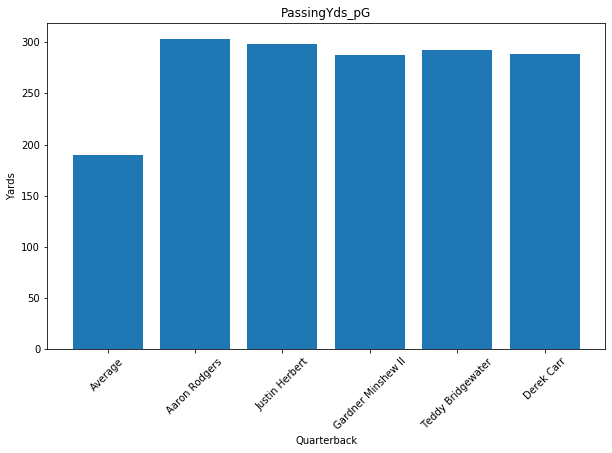

In [46]:
average, rodgers, aaron = print_metric(quarterbacks, 'PassingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassingYds_pG', qb2)
average, minshew, gardner = print_metric(quarterbacks, 'PassingYds_pG', qb3)
average, bridgewater, teddy = print_metric(quarterbacks, 'PassingYds_pG', qb4)
average, carr, derek = print_metric(quarterbacks, 'PassingYds_pG', qb5)

x = ['Average', rodgers, herbert, minshew, bridgewater, carr]
y = [average, aaron, justin, gardner, teddy, derek]

bar_plot(x, y, 'PassingYds_pG', 'Quarterback', 'Yards')

Avg PassesAttempted_pG: 26.28
Aaron Rodgers PassesAttempted_pG: 34.75
--------------------------------------------------
Avg PassesAttempted_pG: 26.28
Justin Herbert PassesAttempted_pG: 35.25
--------------------------------------------------
Avg PassesAttempted_pG: 26.28
Gardner Minshew II PassesAttempted_pG: 39.2
--------------------------------------------------
Avg PassesAttempted_pG: 26.28
Teddy Bridgewater PassesAttempted_pG: 35.6
--------------------------------------------------
Avg PassesAttempted_pG: 26.28
Derek Carr PassesAttempted_pG: 35.0
--------------------------------------------------


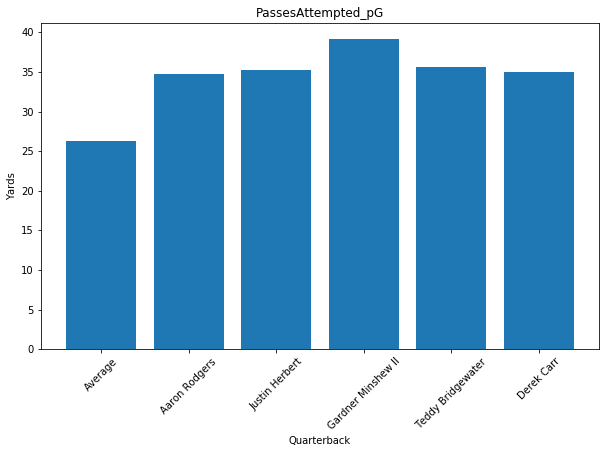

In [48]:
average, rodgers, aaron = print_metric(quarterbacks, 'PassesAttempted_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'PassesAttempted_pG', qb2)
average, minshew, gardner = print_metric(quarterbacks, 'PassesAttempted_pG', qb3)
average, bridgewater, teddy = print_metric(quarterbacks, 'PassesAttempted_pG', qb4)
average, carr, derek = print_metric(quarterbacks, 'PassesAttempted_pG', qb5)

x = ['Average', rodgers, herbert, minshew, bridgewater, carr]
y = [average, aaron, justin, gardner, teddy, derek]

bar_plot(x, y, 'PassesAttempted_pG', 'Quarterback', 'Yards')

Avg Completion_Percent: 0.64
Aaron Rodgers Completion_Percent: 0.71
--------------------------------------------------
Avg Completion_Percent: 0.64
Justin Herbert Completion_Percent: 0.69
--------------------------------------------------
Avg Completion_Percent: 0.64
Gardner Minshew II Completion_Percent: 0.7
--------------------------------------------------
Avg Completion_Percent: 0.64
Teddy Bridgewater Completion_Percent: 0.73
--------------------------------------------------
Avg Completion_Percent: 0.64
Derek Carr Completion_Percent: 0.73
--------------------------------------------------


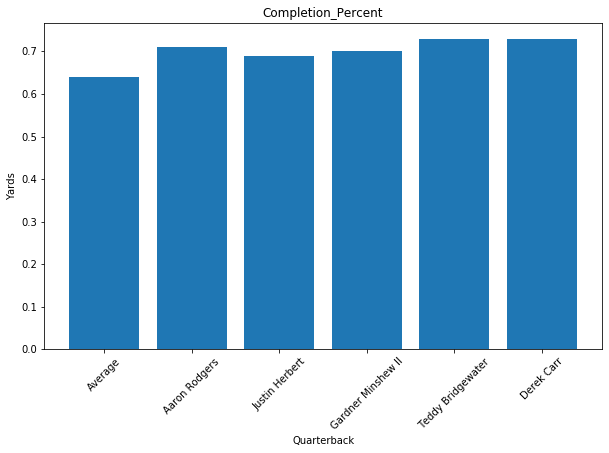

In [47]:
average, rodgers, aaron = print_metric(quarterbacks, 'Completion_Percent', qb1)
average, herbert, justin = print_metric(quarterbacks, 'Completion_Percent', qb2)
average, minshew, gardner = print_metric(quarterbacks, 'Completion_Percent', qb3)
average, bridgewater, teddy = print_metric(quarterbacks, 'Completion_Percent', qb4)
average, carr, derek = print_metric(quarterbacks, 'Completion_Percent', qb5)

x = ['Average', rodgers, herbert, minshew, bridgewater, carr]
y = [average, aaron, justin, gardner, teddy, derek]

bar_plot(x, y, 'Completion_Percent', 'Quarterback', 'Yards')

Avg RushingYds_pG: 11.95
Aaron Rodgers RushingYds_pG: 7.75
--------------------------------------------------
Avg RushingYds_pG: 11.95
Justin Herbert RushingYds_pG: 13.75
--------------------------------------------------
Avg RushingYds_pG: 11.95
Gardner Minshew II RushingYds_pG: 17.4
--------------------------------------------------
Avg RushingYds_pG: 11.95
Teddy Bridgewater RushingYds_pG: 14.6
--------------------------------------------------
Avg RushingYds_pG: 11.95
Derek Carr RushingYds_pG: 6.8
--------------------------------------------------


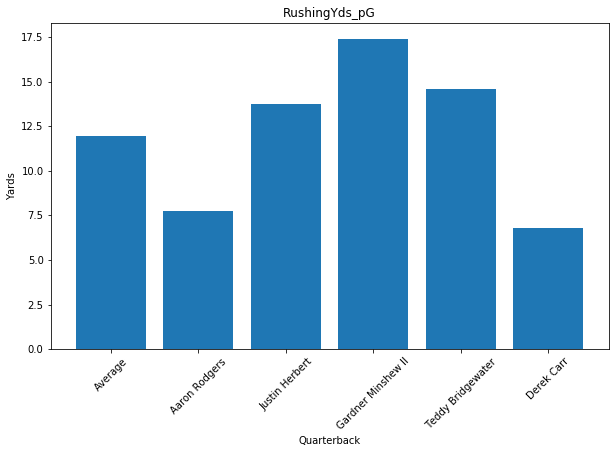

In [49]:
average, rodgers, aaron = print_metric(quarterbacks, 'RushingYds_pG', qb1)
average, herbert, justin = print_metric(quarterbacks, 'RushingYds_pG', qb2)
average, minshew, gardner = print_metric(quarterbacks, 'RushingYds_pG', qb3)
average, bridgewater, teddy = print_metric(quarterbacks, 'RushingYds_pG', qb4)
average, carr, derek = print_metric(quarterbacks, 'RushingYds_pG', qb5)

x = ['Average', rodgers, herbert, minshew, bridgewater, carr]
y = [average, aaron, justin, gardner, teddy, derek]

bar_plot(x, y, 'RushingYds_pG', 'Quarterback', 'Yards')

Week 4 match ups:
    
    Green Bay vs Tampa Bay
    Jacksonville vs Detroit
    Carolina vs Chicago
   
Justin Herbet and the Los Angeles Chargers have a bye this week along with Derek Carr and the Los Vegas Raiders. It makes focusing in on who I want to bring on a little easier but I question what I'm leaving on the table.

In [52]:
qb_opp = ['Tampa Bay Buccaneers', 'Detroit Lions', 'Chicago Bears']

In [53]:
defense[defense['Team'].isin(qb_opp)]

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
7,Chicago Bears,100,331,5.20,1720,130,566,4.40,4,190,5.70,109,11.20,1154,4,19,7,36.80,5,3,2,11,27.00,3.00,12.00,4.00,2.00,6.00,20.00,344.00,26.00,113.20,38.00,21.80,0.57,230.80,2.20,5.40
11,Tampa Bay Buccaneers,112,305,4.90,1491,109,292,2.70,4,179,6.10,127,10.40,1199,7,16,9,56.30,9,6,3,17,42.00,0.00,14.00,16.00,6.00,6.00,22.40,298.20,21.80,58.40,35.80,25.40,0.71,239.80,3.40,8.40
17,Detroit Lions,127,263,6.20,1620,132,681,5.20,6,126,7.20,80,12.50,939,9,16,12,75.00,4,4,0,5,5.00,1.00,-3.00,7.00,0.00,0.00,25.40,324.00,26.40,136.20,25.20,16.00,0.63,187.80,1.00,1.00


In [54]:
def1 = 11
def2 = None
def3 = 17
def4 = 7
def5 = None

In [56]:
print(quarterbacks['Player'][qb1] + ' vs ' + defense['Team'][def1] + ' Summary:')
print('-' * 50)
print('')

print_metric(quarterbacks, 'PassesAttempted_pG', qb1)
print_metric_team(defense, 'Passing_Att_pG', def1)
print('')
print_metric(quarterbacks, 'CompletedPasses_pG', qb1)
print_metric_team(defense, 'Completions_pG', def1)
print('')
print_metric(quarterbacks, 'PassingYds_pG', qb1)
print_metric_team(defense, 'Passing_Yds_pG', def1)
print('')
print_metric(quarterbacks, 'Completion_Percent', qb1)
print_metric_team(defense, 'Completion_Percent_Allowed', def1)
print('')
print_metric(quarterbacks, 'PassingTDs', qb1)
print_metric_team(defense, 'Passing_TDs', def1)

Aaron Rodgers vs Tampa Bay Buccaneers Summary:
--------------------------------------------------

Avg PassesAttempted_pG: 26.28
Aaron Rodgers PassesAttempted_pG: 34.75
--------------------------------------------------
Avg Passing_Att_pG: 34.23
Tampa Bay Buccaneers Passing_Att_pG: 35.8
--------------------------------------------------

Avg CompletedPasses_pG: 17.15
Aaron Rodgers CompletedPasses_pG: 24.5
--------------------------------------------------
Avg Completions_pG: 22.66
Tampa Bay Buccaneers Completions_pG: 25.4
--------------------------------------------------

Avg PassingYds_pG: 190.31
Aaron Rodgers PassingYds_pG: 303.5
--------------------------------------------------
Avg Passing_Yds_pG: 239.72
Tampa Bay Buccaneers Passing_Yds_pG: 239.8
--------------------------------------------------

Avg Completion_Percent: 0.64
Aaron Rodgers Completion_Percent: 0.71
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Tampa Bay Buccaneers Completio

(8.5, 'Tampa Bay Buccaneers', 7)

In [58]:
print(quarterbacks['Player'][qb3] + ' vs ' + defense['Team'][def3] + ' Summary:')
print('-' * 50)
print('')

print_metric(quarterbacks, 'PassesAttempted_pG', qb3)
print_metric_team(defense, 'Passing_Att_pG', def3)
print('')
print_metric(quarterbacks, 'CompletedPasses_pG', qb3)
print_metric_team(defense, 'Completions_pG', def3)
print('')
print_metric(quarterbacks, 'PassingYds_pG', qb3)
print_metric_team(defense, 'Passing_Yds_pG', def3)
print('')
print_metric(quarterbacks, 'Completion_Percent', qb3)
print_metric_team(defense, 'Completion_Percent_Allowed', def3)
print('')
print_metric(quarterbacks, 'PassingTDs', qb3)
print_metric_team(defense, 'Passing_TDs', def3)

Gardner Minshew II vs Detroit Lions Summary:
--------------------------------------------------

Avg PassesAttempted_pG: 26.28
Gardner Minshew II PassesAttempted_pG: 39.2
--------------------------------------------------
Avg Passing_Att_pG: 34.23
Detroit Lions Passing_Att_pG: 25.2
--------------------------------------------------

Avg CompletedPasses_pG: 17.15
Gardner Minshew II CompletedPasses_pG: 27.4
--------------------------------------------------
Avg Completions_pG: 22.66
Detroit Lions Completions_pG: 16.0
--------------------------------------------------

Avg PassingYds_pG: 190.31
Gardner Minshew II PassingYds_pG: 287.8
--------------------------------------------------
Avg Passing_Yds_pG: 239.72
Detroit Lions Passing_Yds_pG: 187.8
--------------------------------------------------

Avg Completion_Percent: 0.64
Gardner Minshew II Completion_Percent: 0.7
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Detroit Lions Completion_Percent_Al

(8.5, 'Detroit Lions', 9)

In [59]:
print(quarterbacks['Player'][qb4] + ' vs ' + defense['Team'][def4] + ' Summary:')
print('-' * 50)
print('')

print_metric(quarterbacks, 'PassesAttempted_pG', qb4)
print_metric_team(defense, 'Passing_Att_pG', def4)
print('')
print_metric(quarterbacks, 'CompletedPasses_pG', qb4)
print_metric_team(defense, 'Completions_pG', def4)
print('')
print_metric(quarterbacks, 'PassingYds_pG', qb4)
print_metric_team(defense, 'Passing_Yds_pG', def4)
print('')
print_metric(quarterbacks, 'Completion_Percent', qb4)
print_metric_team(defense, 'Completion_Percent_Allowed', def4)
print('')
print_metric(quarterbacks, 'PassingTDs', qb4)
print_metric_team(defense, 'Passing_TDs', def4)

Teddy Bridgewater vs Chicago Bears Summary:
--------------------------------------------------

Avg PassesAttempted_pG: 26.28
Teddy Bridgewater PassesAttempted_pG: 35.6
--------------------------------------------------
Avg Passing_Att_pG: 34.23
Chicago Bears Passing_Att_pG: 38.0
--------------------------------------------------

Avg CompletedPasses_pG: 17.15
Teddy Bridgewater CompletedPasses_pG: 26.0
--------------------------------------------------
Avg Completions_pG: 22.66
Chicago Bears Completions_pG: 21.8
--------------------------------------------------

Avg PassingYds_pG: 190.31
Teddy Bridgewater PassingYds_pG: 292.0
--------------------------------------------------
Avg Passing_Yds_pG: 239.72
Chicago Bears Passing_Yds_pG: 230.8
--------------------------------------------------

Avg Completion_Percent: 0.64
Teddy Bridgewater Completion_Percent: 0.73
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.66
Chicago Bears Completion_Percent_Allowe

(8.5, 'Chicago Bears', 4)

With Prescott out for the season, Rodgers will be my starting quarterback, but I want one on the bench to have ready. Oddly enough Minshew is proving to be the best option especially considering the Detriot Lions have allowed for 75% of Red Zone attempts to score.

## Runningbacks

In [60]:
runningbacks = offense[offense['Position'] == 'RB']

In [61]:
per_week_stats(runningbacks, 'RushingAttempts', 'Games')
per_week_stats(runningbacks, 'RushingYds', 'Games')
per_week_stats(runningbacks, 'Targeted', 'Games')
per_week_stats(runningbacks, 'Receptions', 'Games')

In [62]:
runningbacks.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG
0,Alvin Kamara,NOR,RB,25,5,4,0,0,0,0,0,61,281,10.10,4,45,38,395,13.90,3,0,0,7,0,0,128.60,1,1,109.60,18.70,29.40,31.70,17.90,11.90,12.20,56.20,9.00,7.60
2,Dalvin Cook,MIN,RB,25,5,5,0,0,0,0,0,92,489,8.20,7,16,12,64,8.30,0,1,1,7,3,0,107.30,2,3,101.30,20.80,15.10,23.90,26.60,14.90,18.40,97.80,3.20,2.40
7,Ezekiel Elliott,DAL,RB,25,5,5,0,0,0,0,0,89,364,4.90,5,32,24,173,9.10,1,3,2,6,1,0,99.70,3,8,87.70,24.70,16.20,11.80,12.50,22.50,17.80,72.80,6.40,4.80
8,Aaron Jones,GNB,RB,26,4,4,0,0,0,0,0,65,374,12.50,4,23,15,135,9.00,2,1,0,6,0,0,94.40,4,9,86.90,13.60,41.60,14.60,17.10,0.00,16.25,93.50,5.75,3.75
13,Chris Carson,SEA,RB,26,5,5,0,0,0,0,0,61,289,11.40,3,23,21,140,12.70,3,1,0,6,0,0,89.40,5,14,78.90,18.60,16.80,7.60,22.00,13.90,12.20,57.80,4.60,4.20


In [63]:
runningbacks[runningbacks['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG
13,Chris Carson,SEA,RB,26,5,5,0,0,0,0,0,61,289,11.40,3,23,21,140,12.70,3,1,0,6,0,0,89.40,5,14,78.90,18.60,16.80,7.60,22.00,13.90,12.20,57.80,4.60,4.20
31,Derrick Henry,TEN,RB,26,4,4,0,0,0,0,0,101,376,10.20,4,10,6,32,8.30,0,0,0,4,0,0,67.80,11,32,64.80,13.10,8.40,25.00,0.00,18.30,25.25,94.00,2.50,1.50
38,Darrell Henderson,LAR,RB,23,5,3,0,0,0,0,0,58,260,8.80,3,11,7,92,14.40,1,0,0,4,0,0,62.70,14,39,59.20,0.60,18.10,18.00,3.80,18.80,11.60,52.00,2.20,1.40
267,Damien Harris,NWE,RB,23,1,1,0,0,0,0,0,17,100,13.80,0,0,0,0,0.00,0,0,0,0,0,0,10.00,77,,10.00,0.00,0.00,0.00,10.00,0.00,17.00,100.00,0.00,0.00


In [64]:
available_rbs = runningbacks[~runningbacks['Player'].isin(taken_wrt)]

In [66]:
rb1 = 31
rb2 = 13
rb3 = 38
rb4 = 267

Avg RushingAttempts_pG: 4.38
Derrick Henry RushingAttempts_pG: 25.25
--------------------------------------------------
Avg RushingAttempts_pG: 4.38
Chris Carson RushingAttempts_pG: 12.2
--------------------------------------------------
Avg RushingAttempts_pG: 4.38
Darrell Henderson RushingAttempts_pG: 11.6
--------------------------------------------------
Avg RushingAttempts_pG: 4.38
Damien Harris RushingAttempts_pG: 17.0
--------------------------------------------------


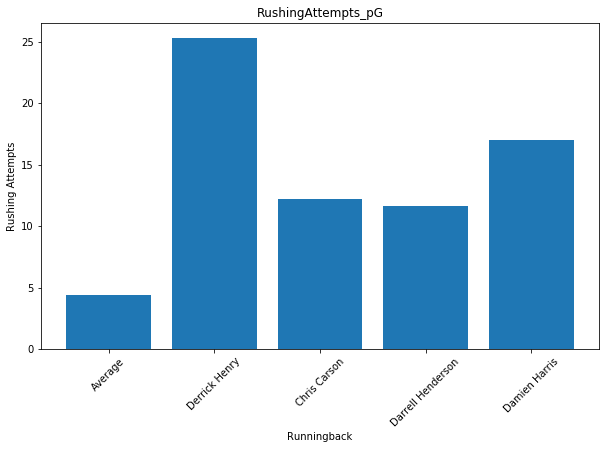

In [67]:
average, henry, derrick = print_metric(available_rbs, 'RushingAttempts_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'RushingAttempts_pG', rb2)
average, henderson, darrell = print_metric(available_rbs, 'RushingAttempts_pG', rb3)
average, harris, damien = print_metric(available_rbs, 'RushingAttempts_pG', rb4)

x = ['Average', henry, carson, henderson, harris]
y = [average, derrick, chris, darrell, damien]

bar_plot(x, y, 'RushingAttempts_pG', 'Runningback', 'Rushing Attempts')

Avg RushingYds_pG: 18.25
Derrick Henry RushingYds_pG: 94.0
--------------------------------------------------
Avg RushingYds_pG: 18.25
Chris Carson RushingYds_pG: 57.8
--------------------------------------------------
Avg RushingYds_pG: 18.25
Darrell Henderson RushingYds_pG: 52.0
--------------------------------------------------
Avg RushingYds_pG: 18.25
Damien Harris RushingYds_pG: 100.0
--------------------------------------------------


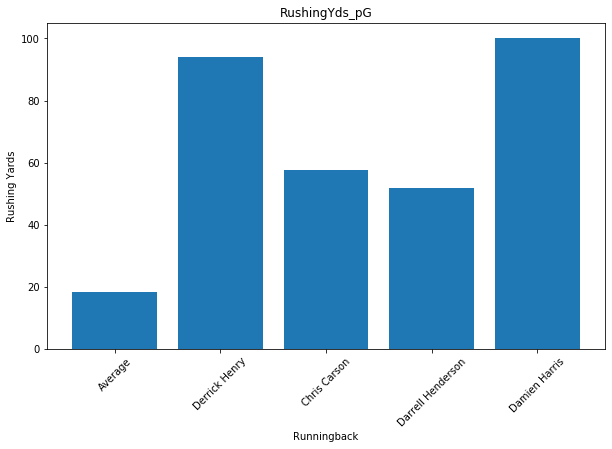

In [68]:
average, henry, derrick = print_metric(available_rbs, 'RushingYds_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'RushingYds_pG', rb2)
average, henderson, darrell = print_metric(available_rbs, 'RushingYds_pG', rb3)
average, harris, damien = print_metric(available_rbs, 'RushingYds_pG', rb4)

x = ['Average', henry, carson, henderson, harris]
y = [average, derrick, chris, darrell, damien]

bar_plot(x, y, 'RushingYds_pG', 'Runningback', 'Rushing Yards')

Avg Targeted_pG: 1.53
Derrick Henry Targeted_pG: 2.5
--------------------------------------------------
Avg Targeted_pG: 1.53
Chris Carson Targeted_pG: 4.6
--------------------------------------------------
Avg Targeted_pG: 1.53
Darrell Henderson Targeted_pG: 2.2
--------------------------------------------------
Avg Targeted_pG: 1.53
Damien Harris Targeted_pG: 0.0
--------------------------------------------------


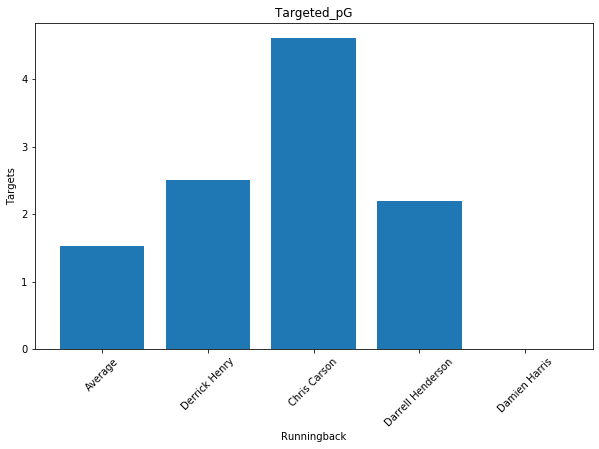

In [69]:
average, henry, derrick = print_metric(available_rbs, 'Targeted_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'Targeted_pG', rb2)
average, henderson, darrell = print_metric(available_rbs, 'Targeted_pG', rb3)
average, harris, damien = print_metric(available_rbs, 'Targeted_pG', rb4)

x = ['Average', henry, carson, henderson, harris]
y = [average, derrick, chris, darrell, damien]

bar_plot(x, y, 'Targeted_pG', 'Runningback', 'Targets')

Avg Receptions_pG: 1.2
Derrick Henry Receptions_pG: 1.5
--------------------------------------------------
Avg Receptions_pG: 1.2
Chris Carson Receptions_pG: 4.2
--------------------------------------------------
Avg Receptions_pG: 1.2
Darrell Henderson Receptions_pG: 1.4
--------------------------------------------------
Avg Receptions_pG: 1.2
Damien Harris Receptions_pG: 0.0
--------------------------------------------------


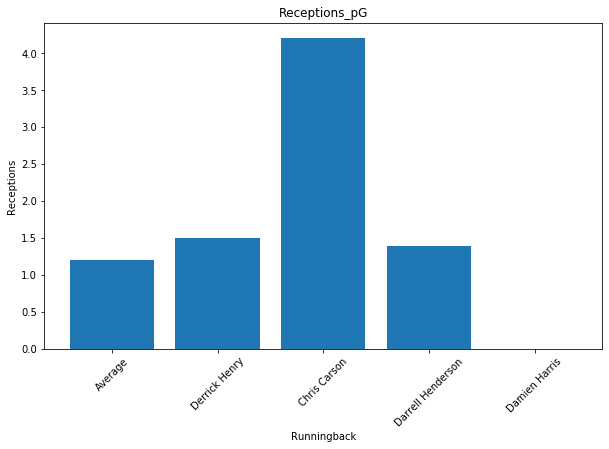

In [70]:
average, henry, derrick = print_metric(available_rbs, 'Receptions_pG', rb1)
average, carson, chris = print_metric(available_rbs, 'Receptions_pG', rb2)
average, henderson, darrell = print_metric(available_rbs, 'Receptions_pG', rb3)
average, harris, damien = print_metric(available_rbs, 'Receptions_pG', rb4)

x = ['Average', henry, carson, henderson, harris]
y = [average, derrick, chris, darrell, damien]

bar_plot(x, y, 'Receptions_pG', 'Runningback', 'Receptions')

In [71]:
top_availRBs = available_rbs[(available_rbs['RushingAttempts_pG'] > available_rbs['RushingAttempts_pG'].mean()*1.5) & (available_rbs['RushingYds_pG'] > available_rbs['RushingYds_pG'].mean()*1.5)] 
top_availRBs = top_availRBs[~top_availRBs['Player'].isin(myteam_wrt)]
top_availRBs.sort_values('RushingYds_pG', ascending=False, inplace=True)
top_availRBs

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,RushingAttempts_pG,RushingYds_pG,Targeted_pG,Receptions_pG
76,Ronald Jones II,TAM,RB,23,5,5,0,0,0,0,0,74,359,12.50,1,23,15,76,5.70,0,0,0,1,0,0,57.00,24,77,49.50,8.20,8.70,7.30,12.80,12.50,14.80,71.80,4.60,3.00
100,Austin Ekeler,LAC,RB,25,4,4,0,0,0,0,0,49,248,5.60,1,17,17,144,12.70,0,0,0,1,0,0,53.70,29,,45.20,8.70,14.80,20.30,1.40,0.00,12.25,62.00,4.25,4.25
119,Adrian Peterson,DET,RB,35,4,2,0,0,0,0,0,54,245,9.40,1,6,4,31,14.50,0,0,0,1,0,0,35.60,37,,33.60,11.40,4.10,8.50,9.60,0.00,13.50,61.25,1.50,1.00
158,Sony Michel,NWE,RB,25,3,3,0,0,0,0,0,26,173,12.50,1,3,2,23,16.00,0,0,0,1,0,0,26.60,44,,25.60,9.70,1.90,14.00,0.00,0.00,8.67,57.67,1.00,0.67
98,Myles Gaskin,MIA,RB,23,5,3,0,0,0,0,0,64,249,11.90,1,25,23,147,9.90,0,0,0,1,0,0,57.10,28,,45.60,6.60,8.20,9.50,6.20,15.10,12.80,49.80,5.00,4.60
118,Alexander Mattison,MIN,RB,22,5,0,0,0,0,0,0,44,219,13.80,1,9,8,57,8.30,0,0,0,1,0,0,37.60,36,,33.60,8.00,1.60,2.70,7.70,13.60,8.80,43.80,1.80,1.60
104,Latavius Murray,NOR,RB,30,5,2,0,0,0,0,0,52,218,5.90,2,8,6,68,14.30,0,0,0,2,0,0,43.60,32,,40.60,4.80,3.30,6.50,20.30,5.70,10.40,43.60,1.60,1.20
107,Malcolm Brown,LAR,RB,27,5,0,0,0,0,0,0,53,213,4.20,2,14,9,44,12.90,0,0,0,2,0,0,42.20,34,,37.70,23.00,4.70,1.90,5.60,2.40,10.60,42.60,2.80,1.80
115,Mark Ingram,BAL,RB,31,5,5,0,0,0,0,0,45,205,9.60,2,5,3,25,11.30,0,0,0,2,0,0,36.50,35,,35.00,2.90,13.70,3.00,9.70,5.70,9.00,41.00,1.00,0.60
171,Frank Gore,NYJ,RB,37,5,4,0,0,0,0,0,64,204,4.90,0,5,2,11,10.00,0,0,0,0,0,0,22.50,48,,21.50,2.40,6.30,6.20,3.60,3.00,12.80,40.80,1.00,0.40


Looking at my RBs, I'm not really interested in trading for someone else. I have a good foursome so I think I'll move ahead with them.

In [72]:
rb_opp = ['Houston Texans', 'Denver Broncos', 'San Francisco 49ers']

In [73]:
defense[defense['Team'].isin(rb_opp)]

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
6,Denver Broncos,98,281,5.20,1461,105,436,4.20,2,166,5.80,108,10.20,1025,7,13,6,46.20,2,1,1,10,14.00,2.00,5.00,1.00,6.00,0.00,19.60,292.20,21.00,87.20,33.20,21.60,0.65,205.00,2.00,2.80
13,San Francisco 49ers,114,311,5.20,1615,141,537,3.80,4,160,6.30,104,10.90,1078,6,12,6,50.00,5,3,2,10,25.00,4.00,5.00,12.00,6.00,-2.00,22.80,323.00,28.20,107.40,32.00,20.80,0.65,215.60,2.00,5.00
20,Houston Texans,140,346,5.60,1937,169,802,4.70,6,163,6.40,112,10.80,1135,9,22,12,54.50,2,0,2,14,16.00,0.00,4.00,1.00,2.00,9.00,28.00,387.40,33.80,160.40,32.60,22.40,0.69,227.00,2.80,3.20


In [74]:
teamRB1 = 20
teamRB2 = None
teamRB3 = 13
teamRB4 = 6

In [75]:
print(runningbacks['Player'][rb1] + ' vs ' + defense['Team'][teamRB1] + ' Summary:')
print('-' * 50)
print('')


print_metric(runningbacks, 'RushingAttempts_pG', rb1)
print_metric_team(defense, 'Rushing_Att_pG', teamRB1)
print('')
print_metric(runningbacks, 'RushingYds_pG', rb1)
print_metric_team(defense, 'Rushing_Yds_pG', teamRB1)

Derrick Henry vs Houston Texans Summary:
--------------------------------------------------

Avg RushingAttempts_pG: 6.41
Derrick Henry RushingAttempts_pG: 25.25
--------------------------------------------------
Avg Rushing_Att_pG: 26.1
Houston Texans Rushing_Att_pG: 33.8
--------------------------------------------------

Avg RushingYds_pG: 27.5
Derrick Henry RushingYds_pG: 94.0
--------------------------------------------------
Avg Rushing_Yds_pG: 113.86
Houston Texans Rushing_Yds_pG: 160.4
--------------------------------------------------


(113.86, 'Houston Texans', 160.4)

In [76]:
# print(runningbacks['Player'][rb2] + ' vs ' + defense['Team'][teamRB2] + ' Summary:')
# print('-' * 50)
# print('')


# print_metric(runningbacks, 'RushingAttempts_pG', rb2)
# print_metric_team(defense, 'Rushing_Att_pG', teamRB2)
# print('')
# print_metric(runningbacks, 'RushingYds_pG', rb2)
# print_metric_team(defense, 'Rushing_Yds_pG', teamRB2)

In [77]:
print(runningbacks['Player'][rb3] + ' vs ' + defense['Team'][teamRB3] + ' Summary:')
print('-' * 50)
print('')


print_metric(runningbacks, 'RushingAttempts_pG', rb3)
print_metric_team(defense, 'Rushing_Att_pG', teamRB3)
print('')
print_metric(runningbacks, 'RushingYds_pG', rb3)
print_metric_team(defense, 'Rushing_Yds_pG', teamRB3)

Darrell Henderson vs San Francisco 49ers Summary:
--------------------------------------------------

Avg RushingAttempts_pG: 6.41
Darrell Henderson RushingAttempts_pG: 11.6
--------------------------------------------------
Avg Rushing_Att_pG: 26.1
San Francisco 49ers Rushing_Att_pG: 28.2
--------------------------------------------------

Avg RushingYds_pG: 27.5
Darrell Henderson RushingYds_pG: 52.0
--------------------------------------------------
Avg Rushing_Yds_pG: 113.86
San Francisco 49ers Rushing_Yds_pG: 107.4
--------------------------------------------------


(113.86, 'San Francisco 49ers', 107.4)

In [78]:
print(runningbacks['Player'][rb4] + ' vs ' + defense['Team'][teamRB4] + ' Summary:')
print('-' * 50)
print('')


print_metric(runningbacks, 'RushingAttempts_pG', rb4)
print_metric_team(defense, 'Rushing_Att_pG', teamRB4)
print('')
print_metric(runningbacks, 'RushingYds_pG', rb4)
print_metric_team(defense, 'Rushing_Yds_pG', teamRB4)

Damien Harris vs Denver Broncos Summary:
--------------------------------------------------

Avg RushingAttempts_pG: 6.41
Damien Harris RushingAttempts_pG: 17.0
--------------------------------------------------
Avg Rushing_Att_pG: 26.1
Denver Broncos Rushing_Att_pG: 21.0
--------------------------------------------------

Avg RushingYds_pG: 27.5
Damien Harris RushingYds_pG: 100.0
--------------------------------------------------
Avg Rushing_Yds_pG: 113.86
Denver Broncos Rushing_Yds_pG: 87.2
--------------------------------------------------


(113.86, 'Denver Broncos', 87.2)

From a productivity standpoint, Ingram just isn't a part of the game like I want him to be. With Harris coming back in last week and earning an impressive 100 yards on 17 carries, I want to take a chance and add him.

## Tight End

In [100]:
tight_ends = offense[offense['Position'] == 'TE']

In [101]:
per_week_stats(tight_ends, 'Targeted', 'Games')
per_week_stats(tight_ends, 'Receptions', 'Games')
per_week_stats(tight_ends, 'ReceivingYds', 'Games')
per_week_stats(tight_ends, 'ReceivingTDs', 'Games')

In [102]:
tight_ends.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG
22,Robert Tonyan,GNB,TE,26,4,3,0,0,0,0,0,0,0,0.00,0,14,13,173,16.10,5,0,0,5,0,0,53.80,1,23,47.30,0.00,8.50,11.00,27.8,3.50,3.25,43.25,1.25
33,Travis Kelce,KAN,TE,31,4,4,0,0,0,0,0,0,0,0.00,0,33,24,297,15.80,2,0,0,2,0,0,53.70,2,34,41.70,11.00,15.00,8.70,7.0,8.25,6.00,74.25,0.50
36,Mark Andrews,BAL,TE,24,4,1,0,0,0,0,0,0,0,0.00,0,20,12,166,21.30,4,1,0,4,0,0,46.60,3,37,40.60,17.80,2.90,2.20,17.7,5.00,3.00,41.50,1.00
49,Jonnu Smith,TEN,TE,25,3,3,0,0,0,0,0,0,0,0.00,0,20,13,181,22.20,3,0,0,3,0,0,42.60,4,50,36.10,9.60,20.40,6.10,0.0,6.67,4.33,60.33,1.00
50,Noah Fant,DEN,TE,23,4,4,0,0,0,0,0,0,0,0.00,0,27,19,219,16.30,2,0,0,2,1,0,45.40,5,51,35.90,14.10,13.70,4.60,3.5,6.75,4.75,54.75,0.50


In [103]:
tight_ends[tight_ends['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG
49,Jonnu Smith,TEN,TE,25,3,3,0,0,0,0,0,0,0,0.00,0,20,13,181,22.20,3,0,0,3,0,0,42.60,4,50,36.10,9.60,20.40,6.10,0.0,6.67,4.33,60.33,1.00
68,Mo Alie-Cox,IND,TE,27,4,2,0,0,0,0,0,0,0,0.00,0,13,11,194,23.40,2,0,0,2,0,0,36.90,10,69,31.40,2.00,11.10,11.00,7.3,3.25,2.75,48.50,0.50


In [109]:
available_te = tight_ends[~tight_ends['Player'].isin(taken_wrt)]
available_te.sort_values('ReceivingYds_pG', ascending = False, inplace = True)
available_te.head()

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Targeted_pG,Receptions_pG,ReceivingYds_pG,ReceivingTDs_pG
49,Jonnu Smith,TEN,TE,25,3,3,0,0,0,0,0,0,0,0.00,0,20,13,181,22.20,3,0,0,3,0,0,42.60,4,50,36.10,9.60,20.40,6.10,0.0,6.67,4.33,60.33,1.00
63,Dalton Schultz,DAL,TE,24,4,2,0,0,0,0,0,0,0,0.00,0,28,18,219,13.70,2,1,1,2,0,0,40.90,8,64,31.90,1.10,12.80,4.80,13.2,7.00,4.50,54.75,0.50
229,David Njoku,CLE,TE,24,1,0,0,0,0,0,0,0,0,0.00,0,3,3,50,22.70,1,0,0,1,0,0,12.50,35,,11.00,11.00,0.00,0.00,0.0,3.00,3.00,50.00,1.00
68,Mo Alie-Cox,IND,TE,27,4,2,0,0,0,0,0,0,0,0.00,0,13,11,194,23.40,2,0,0,2,0,0,36.90,10,69,31.40,2.00,11.10,11.00,7.3,3.25,2.75,48.50,0.50
163,Dallas Goedert,PHI,TE,25,3,1,0,0,0,0,0,0,0,0.00,0,18,13,138,16.20,1,0,0,1,0,0,26.30,20,,19.80,16.10,3.00,0.70,0.0,6.00,4.33,46.00,0.33


In [111]:
te1 = 49
te2 = 68
te3 = 63
# te4 = 22

Avg Targeted_pG: 2.29
Jonnu Smith Targeted_pG: 6.67
--------------------------------------------------
Avg Targeted_pG: 2.29
Mo Alie-Cox Targeted_pG: 3.25
--------------------------------------------------
Avg Targeted_pG: 2.29
Dalton Schultz Targeted_pG: 7.0
--------------------------------------------------


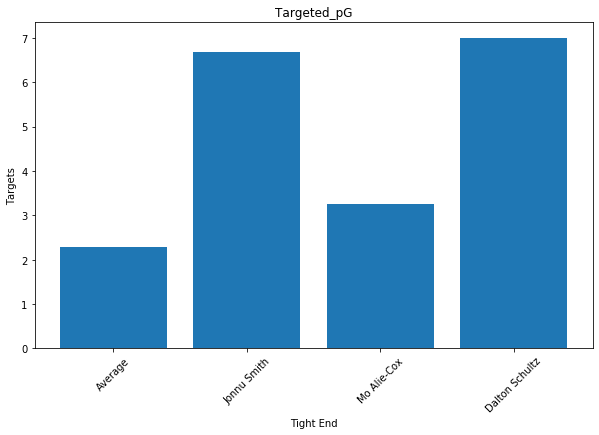

In [112]:
average, smith, jonnu = print_metric(available_te, 'Targeted_pG', te1)
average, alie_cox, mo = print_metric(available_te, 'Targeted_pG', te2)
average, schultz, dalton = print_metric(available_te, 'Targeted_pG', te3)

x = ['Average', smith, alie_cox, schultz]
y = [average, jonnu, mo, dalton]

bar_plot(x, y, 'Targeted_pG', 'Tight End', 'Targets')

Avg Receptions_pG: 1.57
Jonnu Smith Receptions_pG: 4.33
--------------------------------------------------
Avg Receptions_pG: 1.57
Mo Alie-Cox Receptions_pG: 2.75
--------------------------------------------------
Avg Receptions_pG: 1.57
Dalton Schultz Receptions_pG: 4.5
--------------------------------------------------


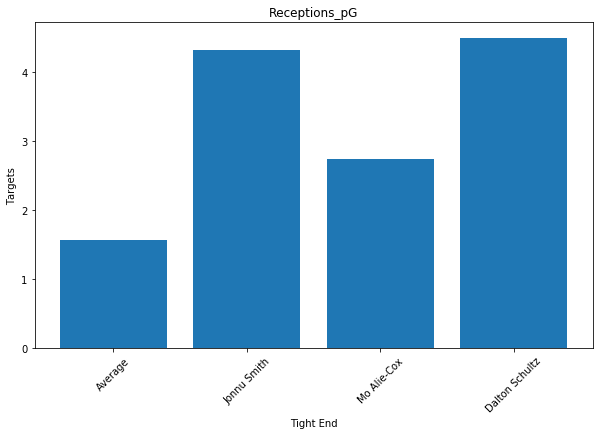

In [113]:
average, smith, jonnu = print_metric(available_te, 'Receptions_pG', te1)
average, alie_cox, mo = print_metric(available_te, 'Receptions_pG', te2)
average, schultz, dalton = print_metric(available_te, 'Receptions_pG', te3)

x = ['Average', smith, alie_cox, schultz]
y = [average, jonnu, mo, dalton]

bar_plot(x, y, 'Receptions_pG', 'Tight End', 'Targets')

Avg ReceivingYds_pG: 16.27
Jonnu Smith ReceivingYds_pG: 60.33
--------------------------------------------------
Avg ReceivingYds_pG: 16.27
Mo Alie-Cox ReceivingYds_pG: 48.5
--------------------------------------------------
Avg ReceivingYds_pG: 16.27
Dalton Schultz ReceivingYds_pG: 54.75
--------------------------------------------------


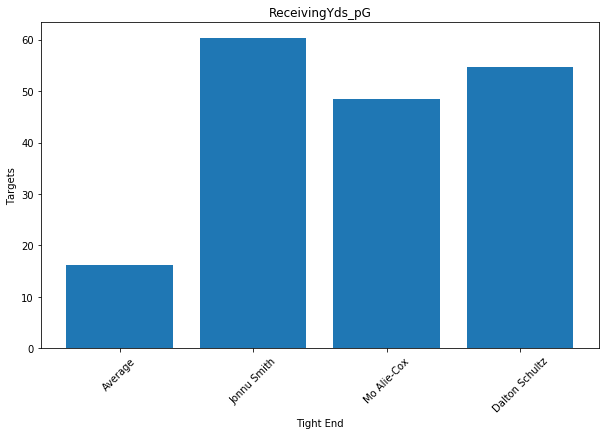

In [114]:
average, smith, jonnu = print_metric(available_te, 'ReceivingYds_pG', te1)
average, alie_cox, mo = print_metric(available_te, 'ReceivingYds_pG', te2)
average, schultz, dalton = print_metric(available_te, 'ReceivingYds_pG', te3)

x = ['Average', smith, alie_cox, schultz]
y = [average, jonnu, mo, dalton]

bar_plot(x, y, 'ReceivingYds_pG', 'Tight End', 'Targets')

In [128]:
te_opp = {'Tennessee Titans': 'Buffalo Bills', 
          'Indianapolis Colts': 'Cleveland Browns', 
          'Dallas Cowboys': 'New York Giants'}

In [130]:
defense[defense['Team'].isin(te_opp.values())]

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
13,New York Giants,96,258,5.10,1313,120,427,3.60,4,128,6.40,89,10.80,886,7,14,9,64.30,4,2,2,10,16.00,4.00,9.00,-2.00,5.00,24.00,328.25,30.00,106.75,32.00,22.25,0.70,221.50,2.50,4.00
16,Buffalo Bills,100,260,5.90,1525,92,404,4.40,4,158,6.70,107,11.00,1121,7,15,9,60.00,6,2,4,10,21.00,8.00,2.00,5.00,6.00,25.00,381.25,23.00,101.00,39.50,26.75,0.68,280.25,2.50,5.25
25,Cleveland Browns,126,287,5.60,1609,94,367,3.90,4,182,6.40,120,11.10,1242,12,16,12,75.00,10,4,6,11,23.00,0.00,4.00,14.00,5.00,31.50,402.25,23.50,91.75,45.50,30.00,0.66,310.50,2.75,5.75


In [131]:
teamTE1 = 16
teamTE2 = 25
teamTE3 = 13

In [133]:
print(tight_ends['Player'][te1] + ' vs ' + defense['Team'][teamTE1] + ' Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', te1)
print_metric_team(defense, 'Passing_Att_pG', teamTE1)
print('')
print_metric(tight_ends, 'Receptions_pG', te1)
print_metric_team(defense, 'Completions_pG', teamTE1)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', te1)
print_metric_team(defense, 'Passing_Yds_pG', teamTE1)

Jonnu Smith vs Buffalo Bills Summary:
--------------------------------------------------

Avg Targeted_pG: 2.96
Jonnu Smith Targeted_pG: 6.67
--------------------------------------------------
Avg Passing_Att_pG: 34.9
Buffalo Bills Passing_Att_pG: 39.5
--------------------------------------------------

Avg Receptions_pG: 2.04
Jonnu Smith Receptions_pG: 4.33
--------------------------------------------------
Avg Completions_pG: 23.27
Buffalo Bills Completions_pG: 26.75
--------------------------------------------------

Avg ReceivingYds_pG: 21.89
Jonnu Smith ReceivingYds_pG: 60.33
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
Buffalo Bills Passing_Yds_pG: 280.25
--------------------------------------------------


(245.9, 'Buffalo Bills', 280.25)

In [134]:
print(tight_ends['Player'][te2] + ' vs ' + defense['Team'][teamTE2] + ' Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', te2)
print_metric_team(defense, 'Passing_Att_pG', teamTE2)
print('')
print_metric(tight_ends, 'Receptions_pG', te2)
print_metric_team(defense, 'Completions_pG', teamTE2)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', te2)
print_metric_team(defense, 'Passing_Yds_pG', teamTE2)

Mo Alie-Cox vs Cleveland Browns Summary:
--------------------------------------------------

Avg Targeted_pG: 2.96
Mo Alie-Cox Targeted_pG: 3.25
--------------------------------------------------
Avg Passing_Att_pG: 34.9
Cleveland Browns Passing_Att_pG: 45.5
--------------------------------------------------

Avg Receptions_pG: 2.04
Mo Alie-Cox Receptions_pG: 2.75
--------------------------------------------------
Avg Completions_pG: 23.27
Cleveland Browns Completions_pG: 30.0
--------------------------------------------------

Avg ReceivingYds_pG: 21.89
Mo Alie-Cox ReceivingYds_pG: 48.5
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
Cleveland Browns Passing_Yds_pG: 310.5
--------------------------------------------------


(245.9, 'Cleveland Browns', 310.5)

In [135]:
print(tight_ends['Player'][te3] + ' vs ' + defense['Team'][teamTE3] + ' Summary:')
print('-' * 50)
print('')


print_metric(tight_ends, 'Targeted_pG', te3)
print_metric_team(defense, 'Passing_Att_pG', teamTE3)
print('')
print_metric(tight_ends, 'Receptions_pG', te3)
print_metric_team(defense, 'Completions_pG', teamTE3)
print('')
print_metric(tight_ends, 'ReceivingYds_pG', te3)
print_metric_team(defense, 'Passing_Yds_pG', teamTE3)

Dalton Schultz vs New York Giants Summary:
--------------------------------------------------

Avg Targeted_pG: 2.96
Dalton Schultz Targeted_pG: 7.0
--------------------------------------------------
Avg Passing_Att_pG: 34.9
New York Giants Passing_Att_pG: 32.0
--------------------------------------------------

Avg Receptions_pG: 2.04
Dalton Schultz Receptions_pG: 4.5
--------------------------------------------------
Avg Completions_pG: 23.27
New York Giants Completions_pG: 22.25
--------------------------------------------------

Avg ReceivingYds_pG: 21.89
Dalton Schultz ReceivingYds_pG: 54.75
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
New York Giants Passing_Yds_pG: 221.5
--------------------------------------------------


(245.9, 'New York Giants', 221.5)

Mo Alie-Cox stepped up last week, but still not in the biggest way. Dalton Schultz has bene targeted 7 times per game for almost 55 yards. He has the benefit of throwing machine Dak Prescott so I'm thinking this week I abandon Alie-Cox and pick up Schultz who's going against the NY Giants who while only allowing 221.5 yards per game, teams have only attempted 32 passes a game. Prescott is throwing 50 per game. Their game is built around him throwing so I'm going all in.

## Wide Receiver

In [136]:
wrs = offense[offense['Position'] == 'WR']

In [137]:
per_week_stats(wrs, 'Targeted', 'Games')
per_week_stats(wrs, 'Receptions', 'Games')
wrs['Catch_Rate'] = wrs['Receptions_pG']/wrs['Targeted_pG']
per_week_stats(wrs, 'ReceivingYds', 'Games')
per_week_stats(wrs, 'ReceivingTDs', 'Games')

In [138]:
wrs[wrs['Player'].isin(myteam_wrt)]

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG
27,DeAndre Hopkins,ARI,WR,28,4,4,0,0,0,0,0,0,0,0.00,0,46,39,397,11.80,1,0,0,1,0,0,65.20,10,28,45.70,15.10,12.80,13.70,4.1,11.50,9.75,0.85,99.25,0.25
32,Robby Anderson,CAR,WR,27,4,4,0,0,0,0,0,0,0,0.00,0,34,28,377,17.60,1,1,1,1,1,0,57.70,14,33,43.80,19.50,8.90,5.50,9.9,8.50,7.00,0.82,94.25,0.25
112,Brandon Aiyuk,SFO,WR,22,3,3,0,0,0,0,0,4,69,19.50,2,16,9,109,13.10,0,0,0,2,0,0,34.30,38,,29.80,0.00,2.10,16.10,11.6,5.33,3.00,0.56,36.33,0.00
158,Julio Jones,ATL,WR,31,3,3,0,0,0,0,0,0,0,0.00,0,20,15,213,16.00,0,0,0,0,0,0,28.80,62,,21.30,15.70,2.40,0.00,3.2,6.67,5.00,0.75,71.00,0.00
165,Diontae Johnson,PIT,WR,24,3,3,0,0,0,0,0,1,9,9.00,0,25,14,149,16.40,1,1,1,1,0,0,26.80,67,,19.80,3.70,15.20,0.90,0.0,8.33,4.67,0.56,49.67,0.33


In [147]:
available_wrs = wrs[~wrs['Player'].isin(taken_wrt)]
top_wrs = available_wrs[(available_wrs['ReceivingYds_pG'] > available_wrs['ReceivingYds_pG'].mean()*1.5) & (available_wrs['Targeted_pG'] > available_wrs['Targeted_pG'].mean()*1.5)]
top_wrs.sort_values('ReceivingYds_pG', ascending = False, inplace = True)
top_wrs

,Player,Team,Position,Age,Games,GamesStarted,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingYdspAtt,RushingTDs,Targeted,Receptions,ReceivingYds,YdspReception,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,TwoPTConversions,TwoPTConversionPasses,FDFantasyPts,PositionRank,OverallRank,TTL,Week_1,Week_2,Week_3,Week_4,Targeted_pG,Receptions_pG,Catch_Rate,ReceivingYds_pG,ReceivingTDs_pG
125,Jamison Crowder,NYJ,WR,27,2,2,0,0,0,0,0,0,0,0.00,0,23,14,219,21.40,1,0,0,1,0,0,34.90,43,,27.90,17.50,0.00,0.00,10.4,11.50,7.00,0.61,109.50,0.50
27,DeAndre Hopkins,ARI,WR,28,4,4,0,0,0,0,0,0,0,0.00,0,46,39,397,11.80,1,0,0,1,0,0,65.20,10,28,45.70,15.10,12.80,13.70,4.1,11.50,9.75,0.85,99.25,0.25
30,Terry McLaurin,WAS,WR,25,4,4,0,0,0,0,0,1,3,3.00,0,39,26,387,22.80,1,0,0,1,0,0,58.00,11,31,45.00,6.10,18.50,8.60,11.8,9.75,6.50,0.67,96.75,0.25
106,Davante Adams,GNB,WR,28,2,2,0,0,0,0,0,0,0,0.00,0,20,17,192,13.90,2,0,0,2,0,0,39.70,33,,31.20,27.60,3.60,0.00,0.0,10.00,8.50,0.85,96.00,1.00
32,Robby Anderson,CAR,WR,27,4,4,0,0,0,0,0,0,0,0.00,0,34,28,377,17.60,1,1,1,1,1,0,57.70,14,33,43.80,19.50,8.90,5.50,9.9,8.50,7.00,0.82,94.25,0.25
43,Allen Lazard,GNB,WR,25,3,3,0,0,0,0,0,2,17,13.00,0,17,13,254,24.40,2,0,0,2,0,0,45.60,19,44,39.10,14.20,4.50,20.40,0.0,5.67,4.33,0.76,84.67,0.67
275,Jeff Smith,NYJ,WR,23,1,1,0,0,0,0,0,0,0,0.00,0,9,7,81,16.70,0,0,0,0,0,0,11.60,113,,8.10,0.00,0.00,0.00,8.1,9.00,7.00,0.78,81.00,0.00
122,D.J. Moore,CAR,WR,23,4,4,0,0,0,0,0,0,0,0.00,0,32,18,288,16.00,0,0,0,0,0,0,37.80,40,,28.80,5.40,12.00,6.50,4.9,8.00,4.50,0.56,72.00,0.00
158,Julio Jones,ATL,WR,31,3,3,0,0,0,0,0,0,0,0.00,0,20,15,213,16.00,0,0,0,0,0,0,28.80,62,,21.30,15.70,2.40,0.00,3.2,6.67,5.00,0.75,71.00,0.00
130,Corey Davis,TEN,WR,25,3,3,0,0,0,0,0,0,0,0.00,0,19,15,206,20.30,1,0,0,1,0,0,34.10,47,,26.60,10.10,9.60,6.90,0.0,6.33,5.00,0.79,68.67,0.33


In [149]:
wr1 = 27
wr2 = 32
wr3 = 112
wr4 = 158
wr5 = 165

Avg Targeted_pG: 3.54
DeAndre Hopkins Targeted_pG: 11.5
--------------------------------------------------
Avg Targeted_pG: 3.54
Robby Anderson Targeted_pG: 8.5
--------------------------------------------------
Avg Targeted_pG: 3.54
Brandon Aiyuk Targeted_pG: 5.33
--------------------------------------------------
Avg Targeted_pG: 3.54
Julio Jones Targeted_pG: 6.67
--------------------------------------------------
Avg Targeted_pG: 3.54
Diontae Johnson Targeted_pG: 8.33
--------------------------------------------------


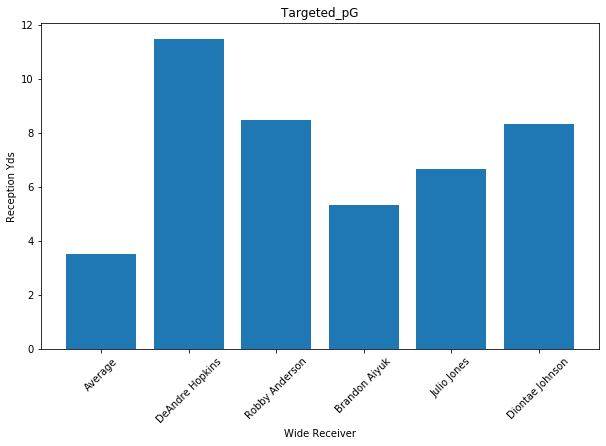

In [150]:
average, hopkins, deandre = print_metric(available_wrs, 'Targeted_pG', wr1)
average, anderson, robby = print_metric(available_wrs, 'Targeted_pG', wr2)
average, aiyuk, brandon = print_metric(available_wrs, 'Targeted_pG', wr3)
average, jones, julio = print_metric(available_wrs, 'Targeted_pG', wr4)
average, johnson, diontae = print_metric(available_wrs, 'Targeted_pG', wr5)

x = ['Average', hopkins, anderson, aiyuk, jones, johnson]
y = [average, deandre, robby, brandon, julio, diontae]

bar_plot(x, y, 'Targeted_pG', 'Wide Receiver', 'Reception Yds')

Avg Receptions_pG: 2.36
DeAndre Hopkins Receptions_pG: 9.75
--------------------------------------------------
Avg Receptions_pG: 2.36
Robby Anderson Receptions_pG: 7.0
--------------------------------------------------
Avg Receptions_pG: 2.36
Brandon Aiyuk Receptions_pG: 3.0
--------------------------------------------------
Avg Receptions_pG: 2.36
Julio Jones Receptions_pG: 5.0
--------------------------------------------------
Avg Receptions_pG: 2.36
Diontae Johnson Receptions_pG: 4.67
--------------------------------------------------


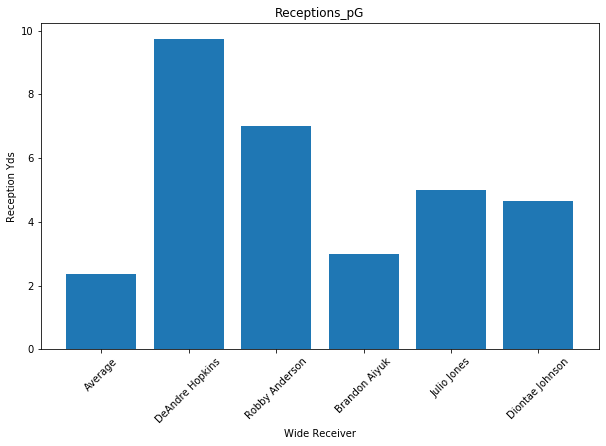

In [151]:
average, hopkins, deandre = print_metric(available_wrs, 'Receptions_pG', wr1)
average, anderson, robby = print_metric(available_wrs, 'Receptions_pG', wr2)
average, aiyuk, brandon = print_metric(available_wrs, 'Receptions_pG', wr3)
average, jones, julio = print_metric(available_wrs, 'Receptions_pG', wr4)
average, johnson, diontae = print_metric(available_wrs, 'Receptions_pG', wr5)

x = ['Average', hopkins, anderson, aiyuk, jones, johnson]
y = [average, deandre, robby, brandon, julio, diontae]

bar_plot(x, y, 'Receptions_pG', 'Wide Receiver', 'Reception Yds')

Avg Catch_Rate: 0.7
DeAndre Hopkins Catch_Rate: 0.85
--------------------------------------------------
Avg Catch_Rate: 0.7
Robby Anderson Catch_Rate: 0.82
--------------------------------------------------
Avg Catch_Rate: 0.7
Brandon Aiyuk Catch_Rate: 0.56
--------------------------------------------------
Avg Catch_Rate: 0.7
Julio Jones Catch_Rate: 0.75
--------------------------------------------------
Avg Catch_Rate: 0.7
Diontae Johnson Catch_Rate: 0.56
--------------------------------------------------


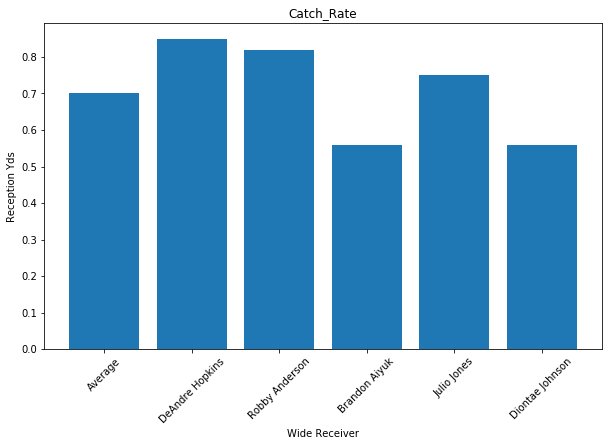

In [152]:
average, hopkins, deandre = print_metric(available_wrs, 'Catch_Rate', wr1)
average, anderson, robby = print_metric(available_wrs, 'Catch_Rate', wr2)
average, aiyuk, brandon = print_metric(available_wrs, 'Catch_Rate', wr3)
average, jones, julio = print_metric(available_wrs, 'Catch_Rate', wr4)
average, johnson, diontae = print_metric(available_wrs, 'Catch_Rate', wr5)

x = ['Average', hopkins, anderson, aiyuk, jones, johnson]
y = [average, deandre, robby, brandon, julio, diontae]

bar_plot(x, y, 'Catch_Rate', 'Wide Receiver', 'Reception Yds')

Avg ReceivingYds_pG: 30.01
DeAndre Hopkins ReceivingYds_pG: 99.25
--------------------------------------------------
Avg ReceivingYds_pG: 30.01
Robby Anderson ReceivingYds_pG: 94.25
--------------------------------------------------
Avg ReceivingYds_pG: 30.01
Brandon Aiyuk ReceivingYds_pG: 36.33
--------------------------------------------------
Avg ReceivingYds_pG: 30.01
Julio Jones ReceivingYds_pG: 71.0
--------------------------------------------------
Avg ReceivingYds_pG: 30.01
Diontae Johnson ReceivingYds_pG: 49.67
--------------------------------------------------


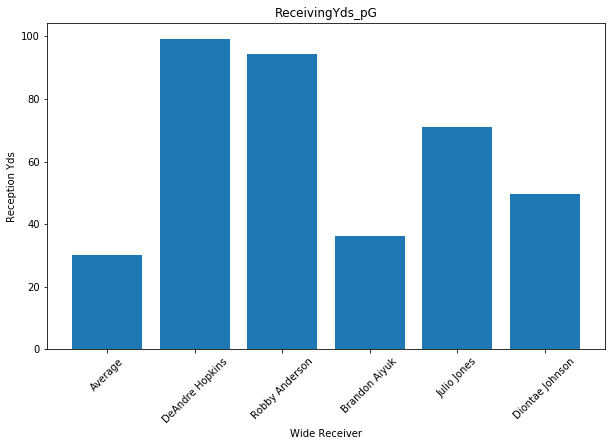

In [153]:
average, hopkins, deandre = print_metric(available_wrs, 'ReceivingYds_pG', wr1)
average, anderson, robby = print_metric(available_wrs, 'ReceivingYds_pG', wr2)
average, aiyuk, brandon = print_metric(available_wrs, 'ReceivingYds_pG', wr3)
average, jones, julio = print_metric(available_wrs, 'ReceivingYds_pG', wr4)
average, johnson, diontae = print_metric(available_wrs, 'ReceivingYds_pG', wr5)

x = ['Average', hopkins, anderson, aiyuk, jones, johnson]
y = [average, deandre, robby, brandon, julio, diontae]

bar_plot(x, y, 'ReceivingYds_pG', 'Wide Receiver', 'Reception Yds')

In [155]:
wr_opp = {'Arizona Cardinals': 'New York Jets', 
          'Carolina Panthers': 'Atlanta Falcons', 
          'San Francisco 49ers': 'Miami Dolphins', 
          'Atlanta Falcons': 'Carolina Panthers', 
          'Pittsburgh Steelers': 'Philadelphia Eagles'}

In [156]:
defense[defense['Team'].isin(list(wr_opp.values()))]

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
12,Miami Dolphins,96,247,6.60,1639,108,499,4.60,7,130,8.20,93,13.00,1140,6,14,11,78.60,5,2,3,9,19.00,2.00,2.00,12.00,3.00,24.00,409.75,27.00,124.75,32.50,23.25,0.72,285.00,2.25,4.75
18,Carolina Panthers,102,247,5.70,1409,99,501,5.10,7,145,6.10,104,8.80,908,6,13,10,76.90,7,2,5,3,16.00,-1.00,3.00,11.00,3.00,25.50,352.25,24.75,125.25,36.25,26.00,0.72,227.00,0.75,4.00
19,Philadelphia Eagles,107,277,5.10,1409,113,435,3.80,6,147,5.90,100,11.00,974,7,16,11,68.80,4,2,2,17,28.00,3.00,-1.00,8.00,18.00,26.75,352.25,28.25,108.75,36.75,25.00,0.68,243.50,4.25,7.00
28,New York Jets,131,259,5.70,1475,124,516,4.20,6,129,7.10,93,10.60,959,7,17,10,58.80,6,4,2,6,19.00,7.00,4.00,0.00,8.00,32.75,368.75,31.00,129.00,32.25,23.25,0.72,239.75,1.50,4.75
29,Atlanta Falcons,138,277,6.50,1793,102,427,4.20,5,168,7.80,121,11.70,1366,13,18,14,77.80,5,2,3,7,7.00,-1.00,3.00,5.00,0.00,34.50,448.25,25.50,106.75,42.00,30.25,0.72,341.50,1.75,1.75


In [157]:
teamWR1 = 28
teamWR2 = 29
teamWR3 = 12
teamWR4 = 18
teamWR5 = 19

In [160]:
print(wrs['Player'][wr1] + ' vs ' + defense['Team'][teamWR1] + ' Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', wr1)
print_metric_team(defense, 'Passing_Att_pG', teamWR1)
print('')
print_metric(wrs, 'Receptions_pG', wr1)
print_metric_team(defense, 'Completions_pG', teamWR1)
print('')
print_metric(wrs, 'Catch_Rate', wr1)
print_metric_team(defense, 'Completion_Percent_Allowed', teamWR1)
print('')
print_metric(wrs, 'ReceivingYds_pG', wr1)
print_metric_team(defense, 'Passing_Yds_pG', teamWR1)

DeAndre Hopkins vs New York Jets Summary:
--------------------------------------------------

Avg Targeted_pG: 4.27
DeAndre Hopkins Targeted_pG: 11.5
--------------------------------------------------
Avg Passing_Att_pG: 34.9
New York Jets Passing_Att_pG: 32.25
--------------------------------------------------

Avg Receptions_pG: 2.84
DeAndre Hopkins Receptions_pG: 9.75
--------------------------------------------------
Avg Completions_pG: 23.27
New York Jets Completions_pG: 23.25
--------------------------------------------------

Avg Catch_Rate: 0.69
DeAndre Hopkins Catch_Rate: 0.85
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.67
New York Jets Completion_Percent_Allowed: 0.72
--------------------------------------------------

Avg ReceivingYds_pG: 36.66
DeAndre Hopkins ReceivingYds_pG: 99.25
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
New York Jets Passing_Yds_pG: 239.75
----------------------------------------

(245.9, 'New York Jets', 239.75)

In [161]:
print(wrs['Player'][wr2] + ' vs ' + defense['Team'][teamWR2] + ' Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', wr2)
print_metric_team(defense, 'Passing_Att_pG', teamWR2)
print('')
print_metric(wrs, 'Receptions_pG', wr2)
print_metric_team(defense, 'Completions_pG', teamWR2)
print('')
print_metric(wrs, 'Catch_Rate', wr2)
print_metric_team(defense, 'Completion_Percent_Allowed', teamWR2)
print('')
print_metric(wrs, 'ReceivingYds_pG', wr2)
print_metric_team(defense, 'Passing_Yds_pG', teamWR2)

Robby Anderson vs Atlanta Falcons Summary:
--------------------------------------------------

Avg Targeted_pG: 4.27
Robby Anderson Targeted_pG: 8.5
--------------------------------------------------
Avg Passing_Att_pG: 34.9
Atlanta Falcons Passing_Att_pG: 42.0
--------------------------------------------------

Avg Receptions_pG: 2.84
Robby Anderson Receptions_pG: 7.0
--------------------------------------------------
Avg Completions_pG: 23.27
Atlanta Falcons Completions_pG: 30.25
--------------------------------------------------

Avg Catch_Rate: 0.69
Robby Anderson Catch_Rate: 0.82
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.67
Atlanta Falcons Completion_Percent_Allowed: 0.72
--------------------------------------------------

Avg ReceivingYds_pG: 36.66
Robby Anderson ReceivingYds_pG: 94.25
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
Atlanta Falcons Passing_Yds_pG: 341.5
---------------------------------------

(245.9, 'Atlanta Falcons', 341.5)

In [162]:
print(wrs['Player'][wr3] + ' vs ' + defense['Team'][teamWR3] + ' Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', wr3)
print_metric_team(defense, 'Passing_Att_pG', teamWR3)
print('')
print_metric(wrs, 'Receptions_pG', wr3)
print_metric_team(defense, 'Completions_pG', teamWR3)
print('')
print_metric(wrs, 'Catch_Rate', wr3)
print_metric_team(defense, 'Completion_Percent_Allowed', teamWR3)
print('')
print_metric(wrs, 'ReceivingYds_pG', wr3)
print_metric_team(defense, 'Passing_Yds_pG', teamWR3)

Brandon Aiyuk vs Miami Dolphins Summary:
--------------------------------------------------

Avg Targeted_pG: 4.27
Brandon Aiyuk Targeted_pG: 5.33
--------------------------------------------------
Avg Passing_Att_pG: 34.9
Miami Dolphins Passing_Att_pG: 32.5
--------------------------------------------------

Avg Receptions_pG: 2.84
Brandon Aiyuk Receptions_pG: 3.0
--------------------------------------------------
Avg Completions_pG: 23.27
Miami Dolphins Completions_pG: 23.25
--------------------------------------------------

Avg Catch_Rate: 0.69
Brandon Aiyuk Catch_Rate: 0.56
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.67
Miami Dolphins Completion_Percent_Allowed: 0.72
--------------------------------------------------

Avg ReceivingYds_pG: 36.66
Brandon Aiyuk ReceivingYds_pG: 36.33
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
Miami Dolphins Passing_Yds_pG: 285.0
------------------------------------------------

(245.9, 'Miami Dolphins', 285.0)

In [163]:
print(wrs['Player'][wr4] + ' vs ' + defense['Team'][teamWR4] + ' Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', wr4)
print_metric_team(defense, 'Passing_Att_pG', teamWR4)
print('')
print_metric(wrs, 'Receptions_pG', wr4)
print_metric_team(defense, 'Completions_pG', teamWR4)
print('')
print_metric(wrs, 'Catch_Rate', wr4)
print_metric_team(defense, 'Completion_Percent_Allowed', teamWR4)
print('')
print_metric(wrs, 'ReceivingYds_pG', wr4)
print_metric_team(defense, 'Passing_Yds_pG', teamWR4)

Julio Jones vs Carolina Panthers Summary:
--------------------------------------------------

Avg Targeted_pG: 4.27
Julio Jones Targeted_pG: 6.67
--------------------------------------------------
Avg Passing_Att_pG: 34.9
Carolina Panthers Passing_Att_pG: 36.25
--------------------------------------------------

Avg Receptions_pG: 2.84
Julio Jones Receptions_pG: 5.0
--------------------------------------------------
Avg Completions_pG: 23.27
Carolina Panthers Completions_pG: 26.0
--------------------------------------------------

Avg Catch_Rate: 0.69
Julio Jones Catch_Rate: 0.75
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.67
Carolina Panthers Completion_Percent_Allowed: 0.72
--------------------------------------------------

Avg ReceivingYds_pG: 36.66
Julio Jones ReceivingYds_pG: 71.0
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
Carolina Panthers Passing_Yds_pG: 227.0
--------------------------------------------

(245.9, 'Carolina Panthers', 227.0)

In [164]:
print(wrs['Player'][wr5] + ' vs ' + defense['Team'][teamWR5] + ' Summary:')
print('-' * 50)
print('')


print_metric(wrs, 'Targeted_pG', wr5)
print_metric_team(defense, 'Passing_Att_pG', teamWR5)
print('')
print_metric(wrs, 'Receptions_pG', wr5)
print_metric_team(defense, 'Completions_pG', teamWR5)
print('')
print_metric(wrs, 'Catch_Rate', wr5)
print_metric_team(defense, 'Completion_Percent_Allowed', teamWR5)
print('')
print_metric(wrs, 'ReceivingYds_pG', wr5)
print_metric_team(defense, 'Passing_Yds_pG', teamWR5)

Diontae Johnson vs Philadelphia Eagles Summary:
--------------------------------------------------

Avg Targeted_pG: 4.27
Diontae Johnson Targeted_pG: 8.33
--------------------------------------------------
Avg Passing_Att_pG: 34.9
Philadelphia Eagles Passing_Att_pG: 36.75
--------------------------------------------------

Avg Receptions_pG: 2.84
Diontae Johnson Receptions_pG: 4.67
--------------------------------------------------
Avg Completions_pG: 23.27
Philadelphia Eagles Completions_pG: 25.0
--------------------------------------------------

Avg Catch_Rate: 0.69
Diontae Johnson Catch_Rate: 0.56
--------------------------------------------------
Avg Completion_Percent_Allowed: 0.67
Philadelphia Eagles Completion_Percent_Allowed: 0.68
--------------------------------------------------

Avg ReceivingYds_pG: 36.66
Diontae Johnson ReceivingYds_pG: 49.67
--------------------------------------------------
Avg Passing_Yds_pG: 245.9
Philadelphia Eagles Passing_Yds_pG: 243.5
------------

(245.9, 'Philadelphia Eagles', 243.5)

I picked up Brandon Aiyuk when Allan Lazard underwent season ending surgery, but it was only because he had scored the most fantasy points by that time and I knew I wasn't starting him. I may want to swap him out for someone else but I'm not jumping for anyone right at this minute.

Julio Jones is someone I do need to keep an eye on. He hasn't played all week and is still grappling with a hamstring injury. When he's on he's great, but when he's not actually playing right now. I want to make sure my team has a good line up should he go out in any big way.

## Defense

In [82]:
ttl_offense = offense[['Team', 'CompletedPasses', 'PassesAttempted', 'PassingYds', 'PassingTDs', 'Interceptions', 
              'RushingAttempts', 'RushingYds', 'RushingTDs', 'Targeted', 'Receptions', 'ReceivingYds', 
              'ReceivingTDs', 'Fumbles', 'LostFumbles', 'TtlTDs', 'FDFantasyPts']]

ttl_offense = ttl_offense.groupby('Team').sum()

In [83]:
ttl_offense.head()

,CompletedPasses,PassesAttempted,PassingYds,PassingTDs,Interceptions,RushingAttempts,RushingYds,RushingTDs,Targeted,Receptions,ReceivingYds,ReceivingTDs,Fumbles,LostFumbles,TtlTDs,FDFantasyPts
Team,,,,,,,,,,,,,,,,
ARI,126,181,1299,8,6,148,705,8,170,126,1299,8,5,1,16,435.40
ATL,129,205,1472,7,3,129,571,6,200,129,1472,7,2,0,13,430.70
BAL,87,137,958,9,3,144,804,5,134,88,973,9,5,2,15,380.10
BUF,134,194,1611,14,3,122,469,4,188,134,1611,14,6,5,18,490.50
CAR,130,178,1460,6,3,136,588,6,172,130,1460,6,3,2,12,421.40


In [84]:
per_week(ttl_offense, 'CompletedPasses', no_games)
per_week(ttl_offense, 'PassesAttempted', no_games)
ttl_offense['Completion_Percent'] = ttl_offense['CompletedPasses_pG']/ttl_offense['PassesAttempted_pG']
per_week(ttl_offense, 'PassingYds', no_games)
ttl_offense['PassYds_pAtt'] = ttl_offense['PassingYds_pG']/ttl_offense['PassesAttempted_pG']
per_week(ttl_offense, 'RushingAttempts', no_games)
per_week(ttl_offense, 'RushingYds', no_games)
ttl_offense['RushYds_pAtt'] = ttl_offense['RushingYds_pG']/ttl_offense['RushingAttempts_pG']
ttl_offense['Ttl_Yds'] = ttl_offense['PassingYds_pG'] + ttl_offense['RushingYds_pG']
per_week(ttl_offense, 'TtlTDs', no_games)

In [85]:
ttl_offense.reset_index(inplace=True)

In [87]:
taken_def = ['Arizona Cardinals', 'Baltimore Ravens', 'Buffalo Bills', 'Indianapolis Colts', 'Kansas City Chiefs', 
             'Los Angeles Rams', 'Pittsburgh Steelers', 'San Francisco 49ers', 'Tampa Bay Buccaneers']

In [88]:
available_def = defense[~defense['Team'].isin(taken_def)]

In [89]:
available_def.sort_values('Ttl_Yds_pG', inplace = True)
available_def.head()

,Team,Ttl_Pts_Allowed,Ttl_Offense_Plays_Allowed,Yds_p_Play,Ttl_Yds,Rushing_Att,Rushing_Yds,Rushing_Yds_p_Att,Rushing_TDs,Passing_Att,Passing_Yds_p_Att,Completions,Yds_p_Completion,Passing_Yds,Passing_TDs,RZ_Att,RZ_TD,RZ_Percent,Ttl_Turnovers,Interceptions,Fumbles,Sacks,TTL,Week_1,Week_2,Week_3,Week_4,Week_5,Ttl_Pts_Allowed_pG,Ttl_Yds_pG,Rushing_Att_pG,Rushing_Yds_pG,Passing_Att_pG,Completions_pG,Completion_Percent_Allowed,Passing_Yds_pG,Sacks_pG,TTL_pG
5,New England Patriots,92,229,6.10,1396,104,461,4.40,1,119,7.50,84,11.60,935,9,12,7,58.30,8,4,4,6,36.00,11.00,6.00,15.00,4.00,0.00,18.40,279.20,20.80,92.20,23.80,16.80,0.71,187.00,1.20,7.20
8,Green Bay Packers,101,233,6.10,1413,88,423,4.80,5,133,6.80,96,11.20,990,7,13,9,69.20,3,2,1,12,25.00,5.00,12.00,3.00,5.00,0.00,20.20,282.60,17.60,84.60,26.60,19.20,0.72,198.00,2.40,5.00
6,Denver Broncos,98,281,5.20,1461,105,436,4.20,2,166,5.80,108,10.20,1025,7,13,6,46.20,2,1,1,10,14.00,2.00,5.00,1.00,6.00,0.00,19.60,292.20,21.00,87.20,33.20,21.60,0.65,205.00,2.00,2.80
17,Detroit Lions,127,263,6.20,1620,132,681,5.20,6,126,7.20,80,12.50,939,9,16,12,75.00,4,4,0,5,5.00,1.00,-3.00,7.00,0.00,0.00,25.40,324.00,26.40,136.20,25.20,16.00,0.63,187.80,1.00,1.00
4,Tennessee Titans,90,264,6.20,1637,108,593,5.50,3,151,6.70,97,11.20,1044,9,12,10,83.30,9,6,3,5,23.00,3.00,5.00,7.00,10.00,8.00,18.00,327.40,21.60,118.60,30.20,19.40,0.64,208.80,1.00,4.60


In [203]:
def_team = 10
off_team = 9

In [211]:
print(defense['Team'][def_team] + ' vs ' + ttl_offense['Team'][off_team] + ' Summary:')
print('-'*50)
print('')

print_metric_team(defense, 'Rushing_Att_pG', def_team)
print_metric_team(ttl_offense, 'RushingAttempts_pG', off_team)

print('')

print_metric_team(defense, 'Rushing_Yds_pG', def_team)
print_metric_team(ttl_offense, 'RushingYds_pG', off_team)

print('')

print_metric_team(defense, 'Rushing_Yds_pG', def_team)
print_metric_team(ttl_offense, 'RushingYds_pG', off_team)

New England Patriots vs DEN Summary:
--------------------------------------------------

Avg Rushing_Att_pG: 27.01
New England Patriots Rushing_Att_pG: 26.0
--------------------------------------------------
Avg RushingAttempts_pG: 26.97
DEN RushingAttempts_pG: 24.25
--------------------------------------------------

Avg Rushing_Yds_pG: 117.84
New England Patriots Rushing_Yds_pG: 115.25
--------------------------------------------------
Avg RushingYds_pG: 117.8
DEN RushingYds_pG: 92.5
--------------------------------------------------


(117.8, 'DEN', 92.5)